<a href="https://colab.research.google.com/github/mion158/data-mining-assignments/blob/main/SomeOtherPlotting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
from sklearn import datasets
iris = pd.read_csv('https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv')

iris.head()


,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


trying some plots:
- Kernel Distribution Estimation Plot: depicts the probability density function of the continuous or non-parametric data variables
- Swarm plot: shows all the data points - understand how the data is distributed across a categorical attribute and how the continuous variable is varying within a category
- Violin plot: a hybrid of a box plot and a kernel density plot, which shows peaks in the data -> display both summary statistics and density


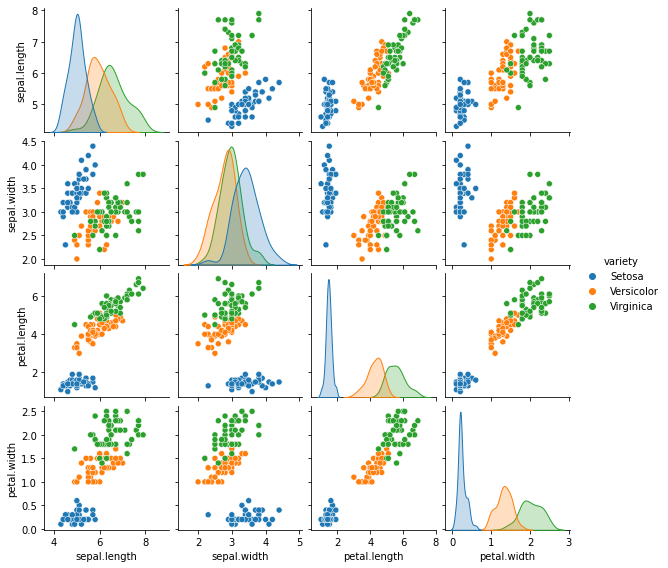

In [27]:
sns.pairplot(iris, hue ='variety', diag_kind='kde', height=2)

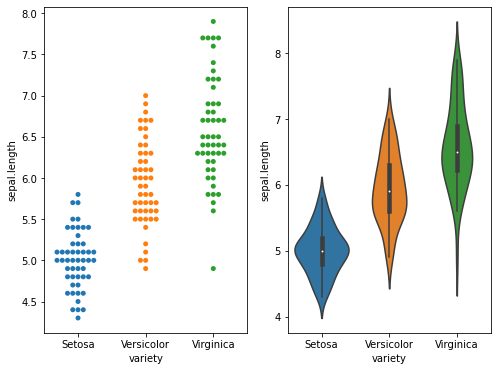

In [28]:
plt.figure(figsize=(8,6))
plt.subplot(1,2,1)
sns.swarmplot(x='variety', y='sepal.length', data=iris)
plt.subplot(1,2,2)
sns.violinplot(x='variety',y='sepal.length',data=iris)

Try some K-nearest neigbour (British grammar :D) 

In [37]:
#first split the dataset
from sklearn.model_selection import train_test_split

X = iris.drop(['variety'], axis =1 )
y = iris['variety']

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=0)

In [67]:
y_train.value_counts()

Virginica     41
Setosa        37
Versicolor    34
Name: variety, dtype: int64

In [53]:
#now create classifier 
from sklearn.neighbors import KNeighborsClassifier
#clf object
knn = KNeighborsClassifier(n_neighbors = 5)
#train
knn.fit(X_train,y_train)
#estimate accuracy
knn.score(X_test,y_test)

0.9736842105263158

In [56]:
#predict
new_iris_predict = knn.predict([[5.2,3.4,	1.9,1.2]])
new_iris_predict[0]

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


'Setosa'

Text(0.5, 1.0, 'Accuracy across varieties')

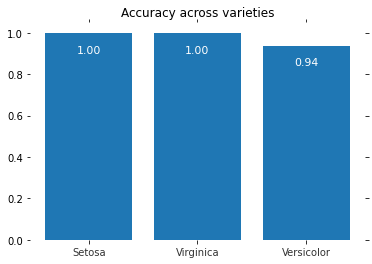

In [76]:
#plot different prediction scores between each iris variety

import numpy as np


setosa_test_X = X_test[y_test=='Setosa']
virginica_test_X = X_test[y_test=='Virginica']
versicolor_test_X = X_test[y_test=='Versicolor']

setosa_test_y = y_test[y_test=='Setosa']
virginica_test_y = y_test[y_test=='Virginica']
versicolor_test_y = y_test[y_test=='Versicolor']

scores = [knn.score(setosa_test_X,setosa_test_y), knn.score(virginica_test_X, virginica_test_y), knn.score(versicolor_test_X, versicolor_test_y) ]

plt.figure()

bars = plt.bar(np.arange(3), scores)

#some labels
for bar in bars:
  height = bar.get_height()
  plt.gca().text(bar.get_x() + bar.get_width()/2, height*.9, '{0:.{1}f}'.format(height,2), ha='center', color='w', fontsize=11) 

#remove bottom 
plt.tick_params(top='off', bottom='off', left='off', right='off', labelleft='off', labelbottom='on')

for spine in plt.gca().spines.values():
  spine.set_visible(False)

plt.xticks([0,1,2], ['Setosa', 'Virginica', 'Versicolor'], alpha=0.8)
plt.title('Accuracy across varieties')
